# Explore and visualise Nanostring results

In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\boldmath \usepackage{amsmath} \usepackage{amssymb}'
from matplotlib.pyplot import cm

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, FixedLocator)

import itertools
from collections import Counter

from scipy.stats.stats import pearsonr, spearmanr
from scipy.stats import ttest_ind

import gc ## for garbage removal

## Import data

In [2]:
data_dir = '../data'
nanostring_file = 'NanoString_wt_mutant_batch1_05_2022-normalised-linear.csv'

In [3]:
## -------------------------  ##
## -- load NanoString data -- ##
## -------------------------- ##
samples = ['WT-v1-Danno-1','WT-v1-Danno-2','WT-v1-Danno-3',
           'MUT-v1-Danno-1','MUT-v1-Danno-2','MUT-v1-Danno-3',
           'WT-v1-Six6-1','WT-v1-Six6-2','WT-v1-Six6-3',
           'MUT-v1-Six6-1','MUT-v1-Six6-2','MUT-v1-Six6-3',
          ]

nanostring_lin_df = pd.read_csv(data_dir+'/'+nanostring_file, sep=',')
nanostring_lin_df['sample'] = samples
nanostring_lin_df = nanostring_lin_df.drop(columns=['Unnamed: 0'])

gene_ids = nanostring_lin_df.columns.tolist()[:-1]
nanostring_lin_df = nanostring_lin_df[['sample']+gene_ids]

nanostring_lin_df.columns = nanostring_lin_df.columns.str.replace('-mRNA','')
genes = nanostring_lin_df.columns.tolist()[1:]
print(len(genes))

180


In [4]:
## sample groups ##
wt_danno_arr  = nanostring_lin_df[genes][nanostring_lin_df['sample'].isin(['WT-v1-Danno-1','WT-v1-Danno-2','WT-v1-Danno-3'])]
wt_six6_arr   = nanostring_lin_df[genes][nanostring_lin_df['sample'].isin(['WT-v1-Six6-1','WT-v1-Six6-2','WT-v1-Six6-3'])]
mut_danno_arr = nanostring_lin_df[genes][nanostring_lin_df['sample'].isin(['MUT-v1-Danno-1','MUT-v1-Danno-2','MUT-v1-Danno-3'])]
mut_six6_arr  = nanostring_lin_df[genes][nanostring_lin_df['sample'].isin(['MUT-v1-Six6-1','MUT-v1-Six6-2','MUT-v1-Six6-3'])]

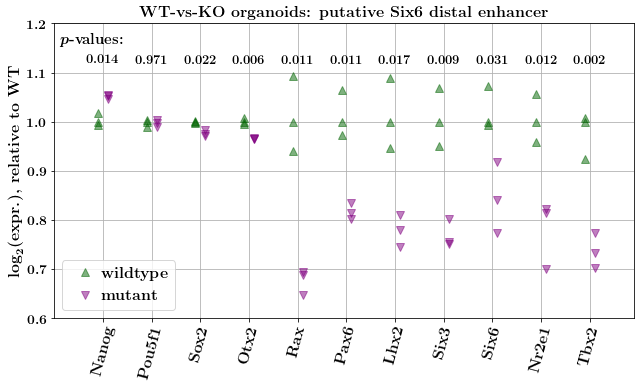

In [5]:
#########################################################
### plot showing NanoString expression relative to WT ###
#########################################################

genes_of_interest = ['Nanog','Pou5f1','Sox2','Otx2','Rax','Pax6','Lhx2','Six3','Six6','Nr2e1','Tbx2']

genes_labels = [r'\bf '+gene for gene in genes_of_interest]
xpts_wt  = np.arange(len(genes_of_interest)) - 0.10
xpts_mut = np.arange(len(genes_of_interest)) + 0.10
pval_txt_yval  = 1.12
pval_txt_yval2 = 1.16


#element_str = 'danno'
element_str = 'distal_six6'

if element_str == 'danno':
    ## plot Danno KO results ##
    wt_array  = wt_danno_arr[genes_of_interest].values
    mut_array = mut_danno_arr[genes_of_interest].values

    
elif element_str == 'distal_six6':
    ## plot Six6 results ##
    wt_array  = wt_six6_arr[genes_of_interest].values
    mut_array = mut_six6_arr[genes_of_interest].values

wt_array  = np.log2(wt_array)
mut_array = np.log2(mut_array)
wt_medians = np.median(wt_array,axis=0)
mut_medians = np.median(mut_array,axis=0)   

plt.figure(figsize=(9.0,5.5))
for i in range(3):
    
    plt.plot(xpts_wt, wt_array[i]/wt_medians,'^',markersize=8,color='DarkGreen',alpha=0.5)
    plt.plot(xpts_mut, mut_array[i]/wt_medians,'v',markersize=8,color='Purple',alpha=0.5)
    
plt.xticks(np.arange(len(genes_of_interest)),genes_labels,fontsize=16,rotation=75)
plt.ylabel(r'\bf $\log_2(\text{expr.})$, relative to WT',fontsize=16)
plt.grid()

pct_differences = 100 * (np.median(mut_array,axis=0)-np.median(wt_array,axis=0)) / np.median(wt_array,axis=0)
for i in range(len(genes_of_interest)):
    tmp_pval = ttest_ind(wt_array[:,i],
                         mut_array[:,i], equal_var=False)[1]
    plt.text(i,pval_txt_yval,r'\bf '+f'{tmp_pval:.3f}',fontsize=13,horizontalalignment='center')

plt.text(-0.25,pval_txt_yval2,r'\bf $p$-values:',fontsize=15,horizontalalignment='center')

if element_str == 'danno':
    plt.title(r'\bf WT-vs-KO organoids: putative Rax proximal enhancer',fontsize=16)
elif element_str == 'distal_six6':
    plt.title(r'\bf WT-vs-KO organoids: putative Six6 distal enhancer',fontsize=16)

xlow = -1
xupp = len(genes_of_interest)-0.1
ylow, yupp = [0.6,1.2]

plt.plot([-100],[-100],'^',markersize=8,color='DarkGreen',alpha=0.5,label=r'\bf wildtype')
plt.plot([-100],[-100],'v',markersize=8,color='Purple',alpha=0.5,label=r'\bf mutant')
plt.xlim(xlow, xupp)
plt.ylim(ylow, yupp)
plt.legend(loc='lower left',fontsize=16,handletextpad=0.01)
ax=plt.gca()
ax.tick_params(axis='y', which='major', labelsize=14)

plt.tight_layout()
#file_str = '09_nanostring_wt_v_mutant_organoids_relative-'+element_str+'.pdf'
#print(file_str)
#plt.savefig('./figures_paper/'+file_str)
plt.show()